# ZCA(Zero-phase Component Analysis) whitening implemantation using SVD

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 1

In [2]:
def pair_plot(X, y, figsize=(16,15), bins=30):
    color = ['indigo', 'seagreen', 'yellow']
    n_samples, n_features = X.shape
    
    plt.figure(figsize=figsize)
    for i in range(n_features):
        for j in range(n_features):
            plt.subplot(n_features, n_features, i*n_features + j + 1)
            if i == j:
                for k, c in enumerate(np.unique(y)):
                    plt.hist(X[:,i][y == c], bins=bins, color=color[k])
                plt.grid()
            else:
                plt.scatter(X[:,i], X[:,j], c=y)
                plt.grid()
    plt.show()

## Load iris dataset

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X, X_test, y, y_test = train_test_split(X, y, test_size=30, random_state=0)

[[ 0.723243   -0.0222465   1.32938165  0.54689846]
 [-0.0222465   0.18654342 -0.29110364 -0.10913725]
 [ 1.32938165 -0.29110364  3.18588165  1.34186064]
 [ 0.54689846 -0.10913725  1.34186064  0.6029909 ]]


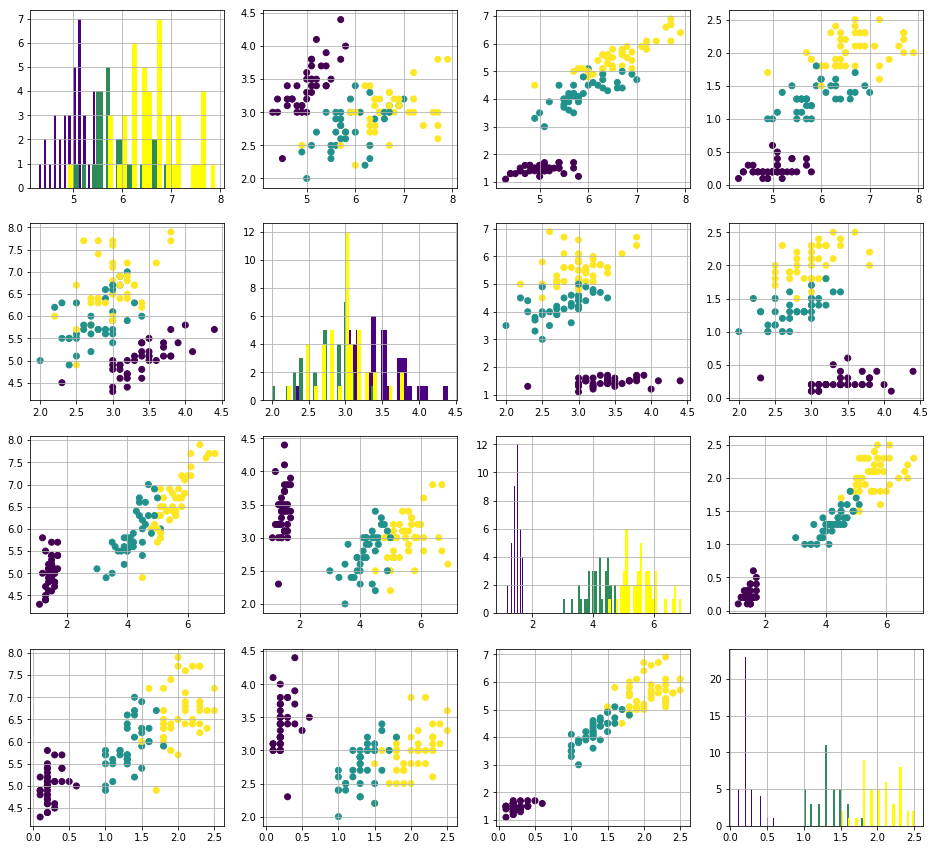

In [4]:
print(np.cov(X.T))
pair_plot(X, y)

## Compare implementations

In [5]:
import sys
sys.path.append('..')

from spmimage.preprocessing.data import WhiteningScaler
from sklearn.decomposition import PCA

## PCA(sklean)

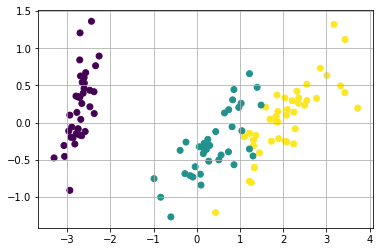

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.grid()
plt.show()

[[  4.35085647e+00   2.93427693e-17   4.31981148e-17  -2.16933471e-17]
 [  2.93427693e-17   2.52270547e-01  -1.82066751e-17  -2.91957223e-18]
 [  4.31981148e-17  -1.82066751e-17   7.36941025e-02   9.00683538e-18]
 [ -2.16933471e-17  -2.91957223e-18   9.00683538e-18   2.18378461e-02]]


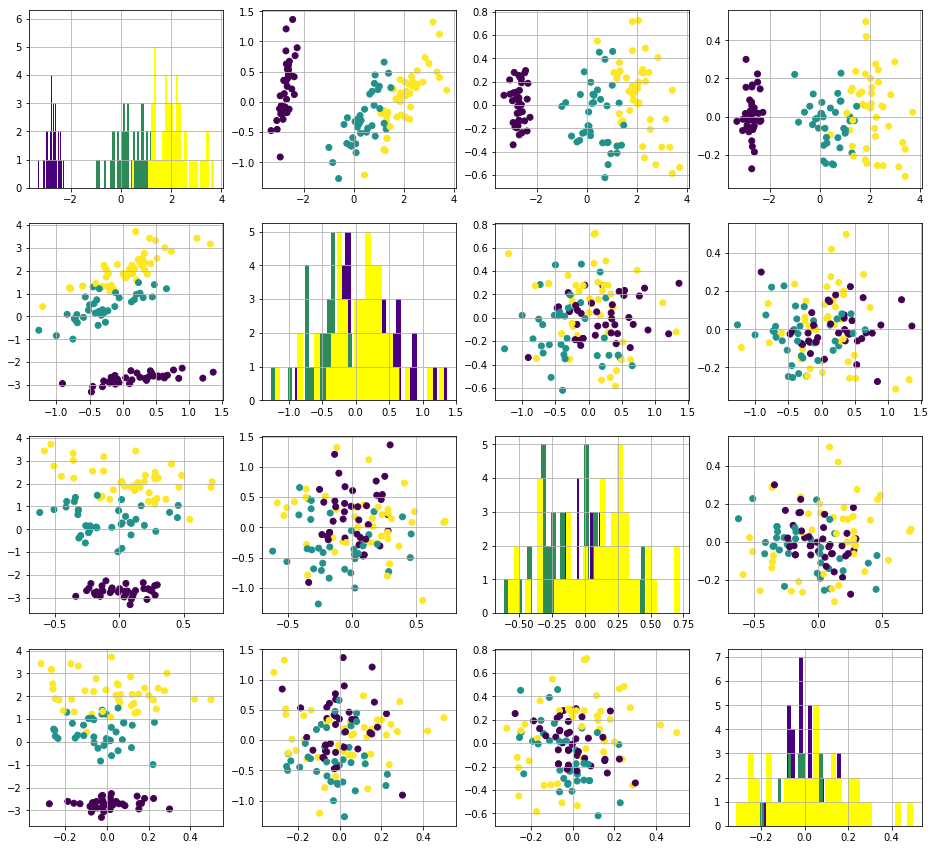

In [7]:
print(np.cov(X_pca.T))
pair_plot(X_pca, y)

## WhiteningScaler(whitening)

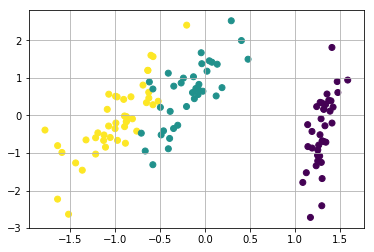

In [8]:
whitening = WhiteningScaler(apply_zca=False)
X_whiten = whitening.fit_transform(X)

plt.figure()
plt.scatter(X_whiten[:,0], X_whiten[:,1], c=y)
plt.grid()
plt.show()

[[  1.00000000e+00  -4.45275599e-16  -1.58258129e-16   1.33171210e-15]
 [ -4.45275599e-16   1.00000000e+00  -7.70903555e-16  -5.39858142e-16]
 [ -1.58258129e-16  -7.70903555e-16   1.00000000e+00  -9.65508831e-16]
 [  1.33171210e-15  -5.39858142e-16  -9.65508831e-16   1.00000000e+00]]


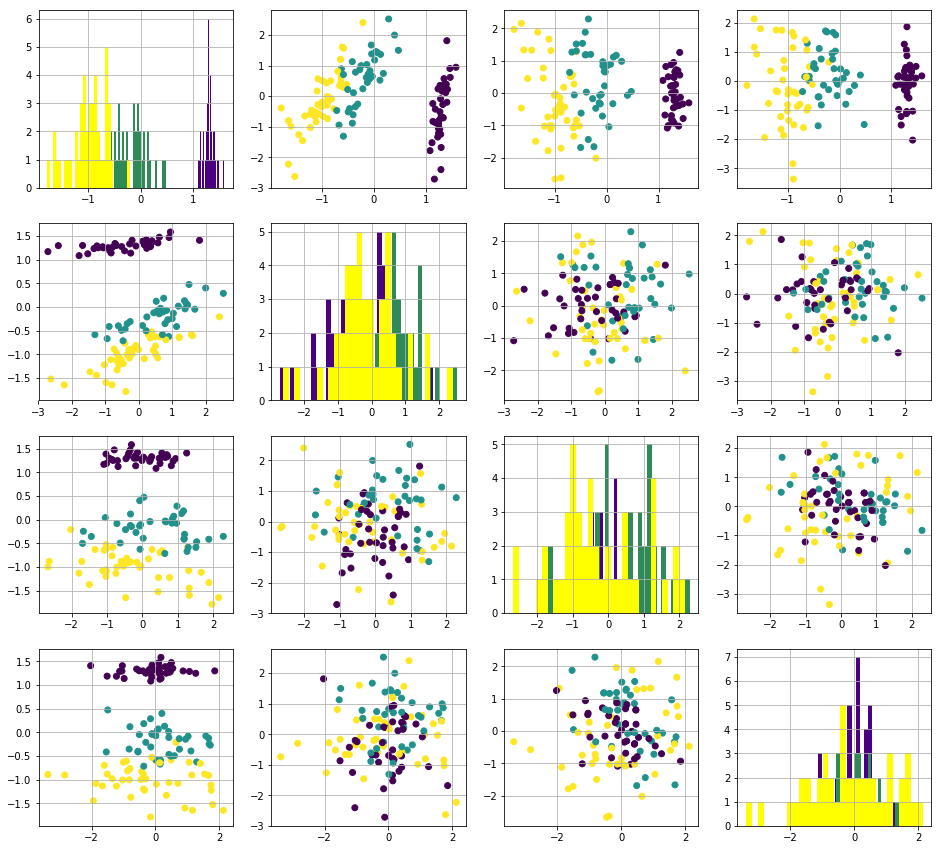

In [9]:
print(np.cov(X_whiten.T))
pair_plot(X_whiten, y)

## WhiteningScaler(ZCA whitening)

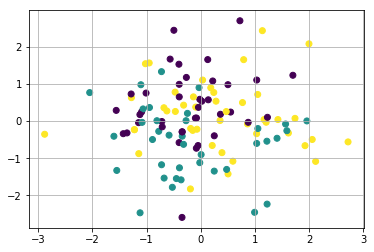

In [10]:
whitening = WhiteningScaler(apply_zca=True)
X_zca = whitening.fit_transform(X)

plt.figure()
plt.scatter(X_zca[:,0], X_zca[:,1], c=y)
plt.grid()
plt.show()

[[  1.00000000e+00  -1.41848338e-15  -6.22583765e-16  -3.84474629e-17]
 [ -1.41848338e-15   1.00000000e+00   2.53377665e-16  -1.45436548e-15]
 [ -6.22583765e-16   2.53377665e-16   1.00000000e+00   6.09425527e-16]
 [ -3.84474629e-17  -1.45436548e-15   6.09425527e-16   1.00000000e+00]]


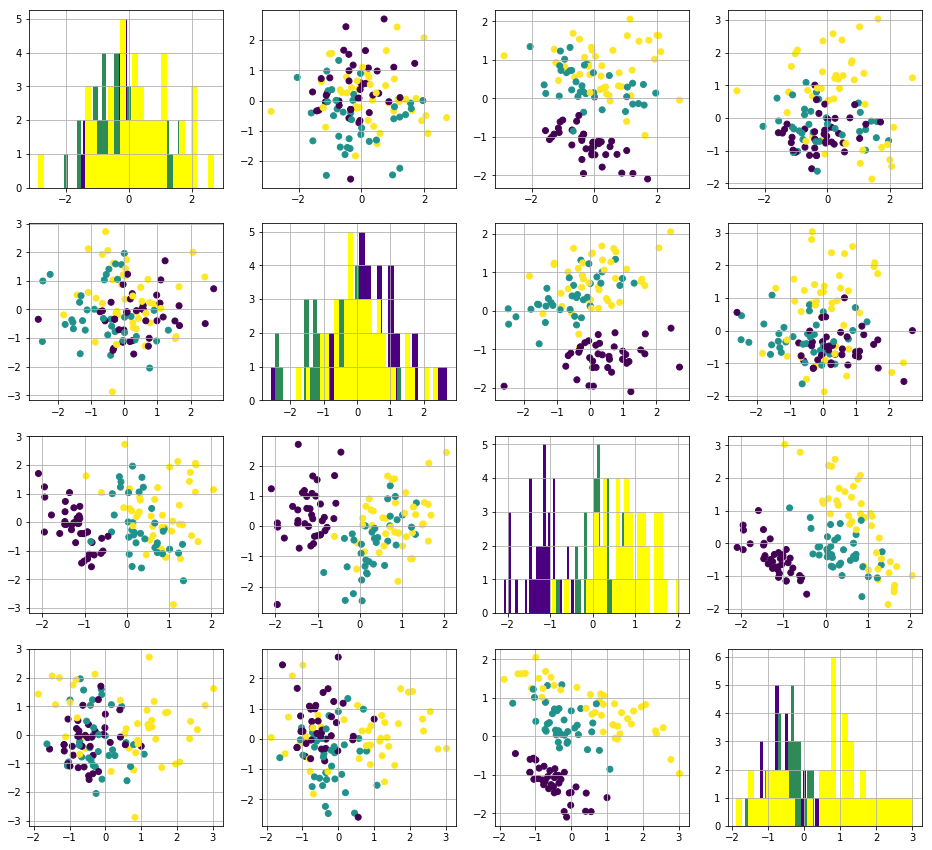

In [11]:
print(np.cov(X_zca.T))
pair_plot(X_zca, y)

## Transform & Inverse transform

In [12]:
X_test_zca = whitening.transform(X_test)
X_pull_backed = whitening.inverse_transform(X_test_zca)

np.all(np.isclose(X_test, X_pull_backed))

True

## Using ZCA whitening as an image preprocessor

(512, 512)


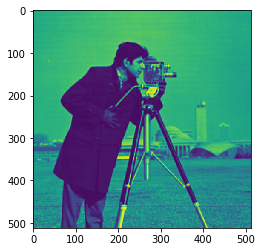

In [13]:
from skimage import data

camera = data.camera()
print(camera.shape)
plt.imshow(camera)

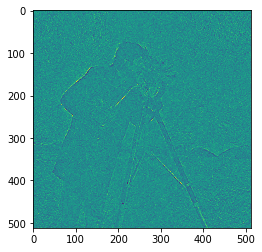

In [14]:
whitening = WhiteningScaler(thresholding='normalize', apply_zca=True)
camera_zca = whitening.fit_transform(camera)

plt.imshow(camera_zca)

## Comparing pixel value distribution

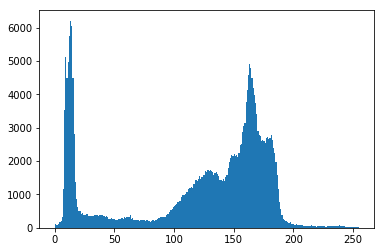

In [15]:
plt.hist(camera.flatten(), bins=255)
plt.show()

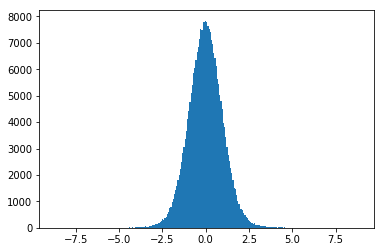

In [16]:
plt.hist(camera_zca.flatten(), bins=255)
plt.show()